### Genes with increased m6A modification rate in NaCl-treated sample

In [1]:
NaCl=open("/home/wuyou/Projects/paper/rice/predict/NaCl_m6A.predict.genome_loc.merge.tsv")
WT=open("/home/wuyou/Projects/paper/rice/predict/WT_m6A.predict.genome_loc.merge.tsv")

WT_dict={}
for line in WT:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    seq=line.split("\t")[2]
    
    A_count=int(line.split("\t")[12])
    m6A_count=int(line.split("\t")[11])
    
    if A_count>=10:
        WT_dict[id]=[m6A_count,A_count]

NaCl_dict={}
for line in NaCl:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    
    if id not in WT_dict:
        continue
    
    seq=line.split("\t")[2]
    
    A_count=int(line.split("\t")[12])
    m6A_count=int(line.split("\t")[11])
    
    if A_count>=10:
        NaCl_dict[id]=[m6A_count,A_count]


In [2]:
#head map   up abiotic stimulus
up_gene_list=["LOC_Os03g23010.2", "LOC_Os08g01380.1", "LOC_Os01g13210.2", "LOC_Os03g23010.1", "LOC_Os01g43540.1",
              "LOC_Os08g01380.2", "LOC_Os12g19470.1", "LOC_Os11g06390.1", "LOC_Os01g62840.1", "LOC_Os03g52840.1", 
              "LOC_Os07g29410.1", "LOC_Os04g55650.1", "LOC_Os03g50480.2", "LOC_Os04g24600.1", "LOC_Os02g57180.2",
              "LOC_Os01g68324.3", "LOC_Os01g13210.1", "LOC_Os11g32650.1", "LOC_Os02g02400.2", "LOC_Os02g02960.3", 
              "LOC_Os09g23160.2", "LOC_Os09g29840.1", "LOC_Os03g52660.1", "LOC_Os07g30970.2", "LOC_Os11g06390.6", 
              "LOC_Os11g06390.5", "LOC_Os07g26690.2", "LOC_Os04g55410.1", "LOC_Os08g38086.4", "LOC_Os04g41560.2", 
              "LOC_Os05g23740.1", "LOC_Os02g57180.1", "LOC_Os03g23010.4", "LOC_Os02g02400.1", "LOC_Os05g08370.1",
              "LOC_Os07g30970.1", "LOC_Os11g06390.2", "LOC_Os06g39906.1", "LOC_Os04g41150.1", "LOC_Os01g13770.1", 
              "LOC_Os05g31140.3", "LOC_Os03g23010.5", "LOC_Os01g40710.1", "LOC_Os09g26810.1", "LOC_Os01g64630.1", 
              "LOC_Os02g02960.2", "LOC_Os03g16860.1", "LOC_Os01g09560.1", "LOC_Os10g38489.1", "LOC_Os03g23010.3", 
              "LOC_Os01g59150.1", "LOC_Os05g31140.1", "LOC_Os08g38086.3", "LOC_Os02g44630.2", "LOC_Os03g16860.2", 
              "LOC_Os09g23160.1", "LOC_Os05g50710.1", "LOC_Os11g06390.4", "LOC_Os07g48780.2", "LOC_Os03g03910.1", 
              "LOC_Os02g03280.3", "LOC_Os03g39610.1", "LOC_Os05g04510.1", "LOC_Os02g44630.3", "LOC_Os01g13770.2", 
              "LOC_Os01g64630.4", "LOC_Os09g29840.2", "LOC_Os02g39360.1", "LOC_Os02g02960.4", "LOC_Os03g52840.2", 
              "LOC_Os03g52840.3", "LOC_Os03g50480.1", "LOC_Os11g06390.3", "LOC_Os01g13770.3", "LOC_Os05g04510.2", 
              "LOC_Os12g19470.2", "LOC_Os05g31140.2", "LOC_Os04g55650.2", "LOC_Os05g42350.1", "LOC_Os02g02400.3",
              "LOC_Os11g09280.2", "LOC_Os12g02300.1", "LOC_Os01g59150.2", "LOC_Os08g09250.3", "LOC_Os02g44630.1", 
              "LOC_Os04g41560.4", "LOC_Os11g09280.1", "LOC_Os08g09200.1", "LOC_Os06g46000.1", "LOC_Os12g19381.1", 
              "LOC_Os11g02350.1", "LOC_Os02g03280.2", "LOC_Os07g48780.1", "LOC_Os02g02960.1", "LOC_Os03g55600.1"]
len(up_gene_list)
up_gene_mod_rate_dict={}

for id in WT_dict:
    if id not in NaCl_dict:
        continue
    transcript_id=id.split(".M")[0]
    
    if transcript_id not in up_gene_list:
        continue
    if transcript_id not in up_gene_mod_rate_dict:
        up_gene_mod_rate_dict[transcript_id]=[0,0,0]
    
    NaCl_mod_rate= NaCl_dict[id][0]/NaCl_dict[id][1]
    WT_mod_rate= WT_dict[id][0]/WT_dict[id][1]  
    
    diff_mod_rate=NaCl_mod_rate-WT_mod_rate
    
    if diff_mod_rate>up_gene_mod_rate_dict[transcript_id][0]:
        up_gene_mod_rate_dict[transcript_id][0]=diff_mod_rate
        up_gene_mod_rate_dict[transcript_id][1]=WT_mod_rate
        up_gene_mod_rate_dict[transcript_id][2]=NaCl_mod_rate
    



In [3]:
#gene name dict
annotation="/home/genome/Osativa_323_v7.0.annotation_info.txt"
gene_name_dict={}

with open(annotation) as f:
    for line in f:
        try:
            gene_id=line.split("\t")[1]
            gene_name=line.split("\t")[11].split(",")[0]
            if len(gene_name)>4:
                gene_name=gene_name.replace("AT-","").replace("At","").replace("AT","").replace("At-","")
            gene_name_dict[gene_id]=gene_name
        except:
            print(line)

LOC_Os05g31140 


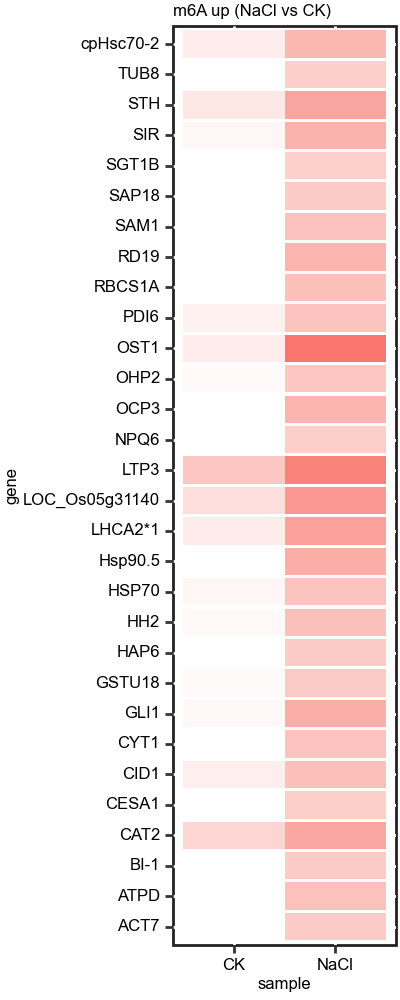

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 2 x 5 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/supplemental_figure_8a_heatmap_m6A_up_genes.pdf


In [5]:
#heatmap sort
from scipy import interpolate
import traceback

from plotnine import *
import pandas as pd
import re
import numpy as np


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

gene=[]
#CK=[]
#NaCl=[]
sample=[]
mod_rate=[]
gene_list=[]

up_gene_mod_rate_dict=dict(sorted(up_gene_mod_rate_dict.items(), key=lambda item: item[1][0],reverse=True))

for i,transcript_id in enumerate(up_gene_mod_rate_dict):

    
    gene_name=gene_name_dict.get(transcript_id.split(".")[0],transcript_id.split(".")[0])
    
    if gene_name not in gene_list:
        gene_list.append(gene_name)
    else:
        continue
    
    
    if gene_name == "":
        print(transcript_id.split(".")[0],gene_name)
        pass
        gene_name=transcript_id.split(".")[0]
    gene.append(gene_name)

    sample.append("CK")
    mod_rate.append(up_gene_mod_rate_dict[transcript_id][1])
    gene.append(gene_name)
    sample.append("NaCl")
    mod_rate.append(up_gene_mod_rate_dict[transcript_id][2])

    if len(gene)==60:
        break
    
data=pd.DataFrame({"gene":gene,"sample":sample,"mod rate":mod_rate})

#data['term'] = pd.Categorical(data.term, categories=pd.unique(data.term))  #reorder legend

p=(ggplot(data,aes("sample","gene",fill="mod rate"))
  +geom_tile(aes(width=1, height=.90))
  #+geom_text(aes(label="mod rate"), size=10)
  #+theme_bw()
  +theme(panel_background=element_rect(fill=gray, alpha=0),
    #legend_position='left',
    #legend_direction='horizontal', # affected by the ncol=2
    legend_title_align='center',
    legend_box_margin=5,
    #legend_background=element_rect(color=purple, size=2, fill='white'),
    legend_position=(1.2, 0.81),
    legend_box='vertical',

    legend_key=element_rect(fill=gray, alpha=1),
    legend_title=element_text(size=6),
    legend_text=element_text(size=6,family="Arial",color="black"),
    
    legend_key_size=0,            # overridden
    legend_key_width=6,
    legend_key_height=6,

    legend_entry_spacing=0,      # overridden
    legend_entry_spacing_x=15,
    legend_entry_spacing_y=5,
         
            
    panel_border=element_rect(color=black, size=1),
    axis_text_x=element_text(size=6,family="Arial",color="black",angle=0),
    axis_text_y=element_text(size=6,family="Arial",color="black"),
    axis_title_x=element_text(size=6,family="Arial",color="black"),
    axis_title_y=element_text(size=6,family="Arial",color="black"),
    plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
    figure_size=[2,5])

   +scale_fill_gradient(low = "white", high = "#F8766D")  
   +ggtitle("m6A up (NaCl vs CK)")
)
print(p)
p.save('figure/supplemental_figure_8a_heatmap_m6A_up_genes.pdf')  



### Genes with decreased m6A modification rate in NaCl-treated sample

In [6]:
#head map   down abiotic stimulus
down_gene_list=["LOC_Os06g04020.1", "LOC_Os01g62420.1", "LOC_Os02g02410.1", "LOC_Os08g08840.1",
                "LOC_Os03g40270.1", "LOC_Os10g08550.3", "LOC_Os03g17690.2", "LOC_Os02g47020.1", 
                "LOC_Os07g41750.3", "LOC_Os02g44630.2", "LOC_Os08g01380.2", "LOC_Os05g06750.1",
                "LOC_Os10g32550.1", "LOC_Os03g23010.1", "LOC_Os03g57790.2", "LOC_Os08g06110.2",
                "LOC_Os01g22010.3", "LOC_Os06g09679.1", "LOC_Os01g22010.4", "LOC_Os05g32110.4", 
                "LOC_Os05g25850.2", "LOC_Os03g52630.2", "LOC_Os11g06390.1", "LOC_Os03g01530.1", 
                "LOC_Os12g19470.1", "LOC_Os05g14194.1", "LOC_Os07g39710.1", "LOC_Os05g40420.3", 
                "LOC_Os11g06390.3", "LOC_Os02g51470.1", "LOC_Os10g28230.1", "LOC_Os01g16240.1", 
                "LOC_Os07g31720.1", "LOC_Os05g41640.1", "LOC_Os07g49400.3", "LOC_Os08g37320.1", 
                "LOC_Os11g13890.2", "LOC_Os03g32314.1", "LOC_Os05g01600.2", "LOC_Os02g44500.1",
                "LOC_Os08g03290.4", "LOC_Os02g09150.1", "LOC_Os01g13210.1", "LOC_Os07g30970.1",
                "LOC_Os05g49880.2", "LOC_Os03g53190.1", "LOC_Os09g30418.1", "LOC_Os01g05490.2",
                "LOC_Os08g03290.3", "LOC_Os02g33450.2", "LOC_Os02g38920.1", "LOC_Os04g46390.2", 
                "LOC_Os01g62420.4", "LOC_Os06g43860.1", "LOC_Os02g51750.2", "LOC_Os04g55650.1", 
                "LOC_Os07g44740.1", "LOC_Os12g23180.1", "LOC_Os02g51750.1", "LOC_Os11g47970.1",
                "LOC_Os07g07240.2", "LOC_Os04g58580.1", "LOC_Os07g34570.1", "LOC_Os08g21660.2",
                "LOC_Os11g09280.1", "LOC_Os04g47220.1", "LOC_Os02g53420.1", "LOC_Os01g43540.1",
                "LOC_Os07g46990.1", "LOC_Os08g01380.1", "LOC_Os05g04510.1", "LOC_Os01g47690.2",
                "LOC_Os03g21950.1", "LOC_Os11g13890.4", "LOC_Os06g09679.3", "LOC_Os03g01190.1",
                "LOC_Os01g62420.3", "LOC_Os03g17690.1", "LOC_Os04g46960.3", "LOC_Os03g46060.1",
                "LOC_Os04g46390.3", "LOC_Os02g07870.1", "LOC_Os05g32110.1", "LOC_Os03g61990.5",
                "LOC_Os02g51470.3", "LOC_Os03g28420.1", "LOC_Os02g02400.2", "LOC_Os06g01210.1",
                "LOC_Os08g32870.1", "LOC_Os04g56400.1", "LOC_Os12g08280.1", "LOC_Os05g49200.1",
                "LOC_Os12g42876.1", "LOC_Os03g61990.3", "LOC_Os12g19381.1", "LOC_Os01g68324.3",
                "LOC_Os06g50300.1", "LOC_Os02g41650.1", "LOC_Os05g07700.3", "LOC_Os07g25420.2",
                "LOC_Os02g55420.1", "LOC_Os04g55650.2", "LOC_Os09g07294.1", "LOC_Os07g34006.1",
                "LOC_Os08g22354.2", "LOC_Os07g46990.2", "LOC_Os11g47760.6", "LOC_Os06g06090.2", 
                "LOC_Os10g08550.5", "LOC_Os09g26730.1", "LOC_Os05g07700.1", "LOC_Os03g38000.1",
                "LOC_Os07g41750.1", "LOC_Os07g49400.2", "LOC_Os04g58580.2", "LOC_Os09g26880.1",
                "LOC_Os03g39610.1", "LOC_Os11g08300.2", "LOC_Os09g36220.2", "LOC_Os11g47760.1",
                "LOC_Os03g52840.2", "LOC_Os01g63270.1", "LOC_Os02g44630.3", "LOC_Os01g45274.1",
                "LOC_Os02g02400.3", "LOC_Os06g08080.1", "LOC_Os06g06090.1", "LOC_Os06g11800.1",
                "LOC_Os02g41650.2", "LOC_Os02g57720.1", "LOC_Os02g02400.1", "LOC_Os01g59600.2",
                "LOC_Os01g47690.1", "LOC_Os07g48780.2", "LOC_Os12g17600.2", "LOC_Os01g62420.2", 
                "LOC_Os11g08300.1", "LOC_Os03g18070.1", "LOC_Os06g46000.1", "LOC_Os05g14194.2",
                "LOC_Os11g13890.5", "LOC_Os05g48800.1", "LOC_Os11g06390.2", "LOC_Os07g41750.2", 
                "LOC_Os06g40080.1", "LOC_Os08g03290.2", "LOC_Os01g59600.1", "LOC_Os02g32030.1",
                "LOC_Os12g42884.1", "LOC_Os01g31690.1", "LOC_Os09g26880.4", "LOC_Os08g03350.1", 
                "LOC_Os05g44360.1", "LOC_Os07g07240.1", "LOC_Os12g05430.1", "LOC_Os04g46960.1", 
                "LOC_Os08g04280.2", "LOC_Os11g06390.4", "LOC_Os11g47760.3", "LOC_Os10g08550.1",
                "LOC_Os01g64630.1", "LOC_Os10g41510.1", "LOC_Os04g38600.4", "LOC_Os11g47760.2", 
                "LOC_Os07g37240.1", "LOC_Os06g02380.1", "LOC_Os03g38000.2", "LOC_Os03g08440.1",
                "LOC_Os08g06110.4", "LOC_Os02g01280.1", "LOC_Os11g09280.2", "LOC_Os03g23010.5",
                "LOC_Os03g03720.2", "LOC_Os07g25420.1", "LOC_Os11g06390.6", "LOC_Os12g44310.2",
                "LOC_Os02g51470.2", "LOC_Os01g04350.1", "LOC_Os06g04070.1", "LOC_Os03g48180.1",
                "LOC_Os08g06110.3", "LOC_Os03g27290.1", "LOC_Os05g32110.3", "LOC_Os03g03720.1",
                "LOC_Os03g14450.2", "LOC_Os01g64630.4", "LOC_Os10g25780.2", "LOC_Os05g42350.1",
                "LOC_Os03g52840.3", "LOC_Os05g04510.2", "LOC_Os09g36220.1", "LOC_Os07g46460.1",
                "LOC_Os05g26890.1", "LOC_Os11g47760.5", "LOC_Os05g48800.2", "LOC_Os05g40420.2",
                "LOC_Os12g44310.1", "LOC_Os01g22010.2", "LOC_Os05g38150.2", "LOC_Os02g54060.2",
                "LOC_Os04g46960.2", "LOC_Os08g33820.1", "LOC_Os05g41640.3", "LOC_Os05g44360.2",
                "LOC_Os07g49400.1", "LOC_Os05g33380.1", "LOC_Os02g09150.2", "LOC_Os03g53190.2",
                "LOC_Os04g56400.3", "LOC_Os04g56400.4", "LOC_Os05g41640.2", "LOC_Os06g43860.4",
                "LOC_Os03g23010.3", "LOC_Os08g06110.5", "LOC_Os03g61990.1", "LOC_Os05g01600.1",
                "LOC_Os05g49200.2", "LOC_Os08g04280.1", "LOC_Os05g28630.1", "LOC_Os09g30412.1",
                "LOC_Os08g03290.1", "LOC_Os12g17600.1", "LOC_Os02g33450.1", "LOC_Os11g06390.5",
                "LOC_Os08g22354.1", "LOC_Os11g19700.1", "LOC_Os10g36650.1", "LOC_Os03g52630.1",
                "LOC_Os12g02300.1", "LOC_Os10g25780.1", "LOC_Os01g31690.2", "LOC_Os05g25850.1",
                "LOC_Os01g63270.2", "LOC_Os03g08440.2", "LOC_Os02g54060.1", "LOC_Os03g61990.4", 
                "LOC_Os12g07220.1", "LOC_Os05g49880.1", "LOC_Os05g38150.1", "LOC_Os12g42884.3", 
                "LOC_Os10g38489.1", "LOC_Os10g25780.3", "LOC_Os05g48800.3", "LOC_Os04g38410.1", 
                "LOC_Os06g43860.2", "LOC_Os12g19470.2", "LOC_Os03g52840.1", "LOC_Os11g13890.6", 
                "LOC_Os11g08300.3", "LOC_Os10g38740.1", "LOC_Os02g41650.3", "LOC_Os05g32110.2",
                "LOC_Os06g09679.2", "LOC_Os01g22520.2", "LOC_Os03g14450.1", "LOC_Os08g21660.1", 
                "LOC_Os07g48780.1", "LOC_Os09g26880.3", "LOC_Os08g08840.2", "LOC_Os12g42884.2", 
                "LOC_Os03g50480.2", "LOC_Os02g44630.1", "LOC_Os01g46610.1", "LOC_Os07g49400.4",
                "LOC_Os05g07700.4", "LOC_Os04g46390.1", "LOC_Os06g02380.2", "LOC_Os01g22010.1", 
                "LOC_Os07g27790.1", "LOC_Os03g60620.1", "LOC_Os07g30970.2", "LOC_Os03g23010.2",
                "LOC_Os01g43410.1", "LOC_Os03g57790.1", "LOC_Os07g34570.2", "LOC_Os01g13210.2",
                "LOC_Os07g49150.1", "LOC_Os01g22520.1", "LOC_Os03g50480.1", "LOC_Os03g18690.1",
                "LOC_Os12g36194.1", "LOC_Os11g13890.1", "LOC_Os03g61990.2", "LOC_Os01g05490.1",
                "LOC_Os11g47760.4", "LOC_Os03g23010.4", "LOC_Os12g14070.1"]


len(down_gene_list)
down_gene_mod_rate_dict={}

for id in WT_dict:
    if id not in NaCl_dict:
        continue
    transcript_id=id.split(".M")[0]
    
    if transcript_id not in down_gene_list:
        continue
    if transcript_id not in down_gene_mod_rate_dict:
        down_gene_mod_rate_dict[transcript_id]=[0,0,0]
    
    NaCl_mod_rate= NaCl_dict[id][0]/NaCl_dict[id][1]
    WT_mod_rate= WT_dict[id][0]/WT_dict[id][1]  
    
    diff_mod_rate=WT_mod_rate-NaCl_mod_rate
    
    if diff_mod_rate>down_gene_mod_rate_dict[transcript_id][0]:
        down_gene_mod_rate_dict[transcript_id][0]=diff_mod_rate
        down_gene_mod_rate_dict[transcript_id][1]=WT_mod_rate
        down_gene_mod_rate_dict[transcript_id][2]=NaCl_mod_rate
    



LOC_Os02g01280 


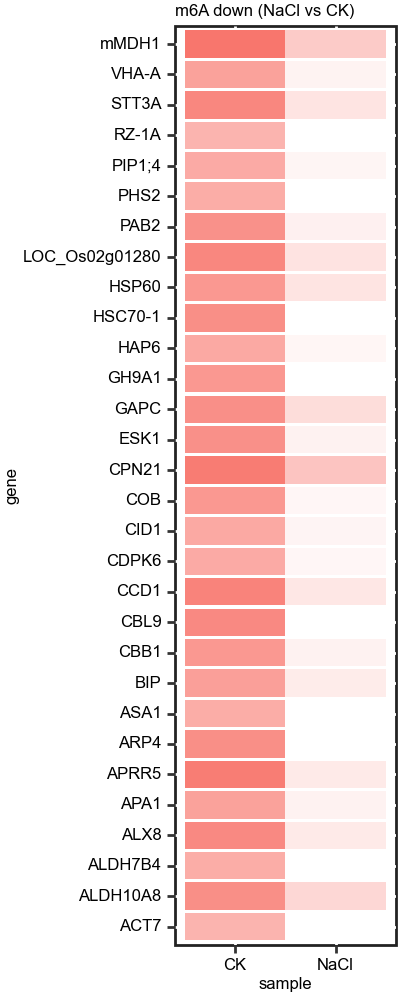

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 2 x 5 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/supplemental_figure_8b_heatmap_m6A_down_genes.pdf


In [8]:
#heatmap sort
from scipy import interpolate
import traceback

from plotnine import *
import pandas as pd
import re
import numpy as np


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

gene=[]
#CK=[]
#NaCl=[]
sample=[]
mod_rate=[]
gene_list=[]

down_gene_mod_rate_dict=dict(sorted(down_gene_mod_rate_dict.items(), key=lambda item: item[1][0],reverse=True))

for i,transcript_id in enumerate(down_gene_mod_rate_dict):


    gene_name=gene_name_dict.get(transcript_id.split(".")[0],transcript_id.split(".")[0])
    
    if gene_name not in gene_list:
        gene_list.append(gene_name)
    else:
        continue
    
    if gene_name == "":
        print(transcript_id.split(".")[0],gene_name)

        gene_name=transcript_id.split(".")[0]
        
    gene.append(gene_name)
    sample.append("CK")
    mod_rate.append(down_gene_mod_rate_dict[transcript_id][1])
    gene.append(gene_name)
    sample.append("NaCl")
    mod_rate.append(down_gene_mod_rate_dict[transcript_id][2])

    if len(gene)==60:
        break

data=pd.DataFrame({"gene":gene,"sample":sample,"mod rate":mod_rate})

#data['term'] = pd.Categorical(data.term, categories=pd.unique(data.term))  #reorder legend

p=(ggplot(data,aes("sample","gene",fill="mod rate"))
  +geom_tile(aes(width=1, height=.90))
  #+geom_text(aes(label="mod rate"), size=10)
  #+theme_bw()
  +theme(panel_background=element_rect(fill=gray, alpha=0),
    #legend_position='left',
    #legend_direction='horizontal', # affected by the ncol=2
    legend_title_align='center',
    legend_box_margin=5,
    #legend_background=element_rect(color=purple, size=2, fill='white'),
    legend_position=(1.2,0.81),
    legend_box='vertical',

    legend_key=element_rect(fill=gray, alpha=1),
    legend_title=element_text(size=6),
    legend_text=element_text(size=6,family="Arial",color="black"),

    legend_key_size=0,            # overridden
    legend_key_width=6,
    legend_key_height=6,

    legend_entry_spacing=0,      # overridden
    legend_entry_spacing_x=15,
    legend_entry_spacing_y=5,
         
            #panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            #panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text_x=element_text(size=6,family="Arial",color="black",angle=0),
            axis_text_y=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            
            #legend_position =  "none",
            figure_size=[2,5])
#+labs(y = "-log10(pvalue)")
   +scale_fill_gradient(low = "white", high = "#F8766D")  
   +ggtitle("m6A down (NaCl vs CK)")
)

print(p)
p.save('figure/supplemental_figure_8b_heatmap_m6A_down_genes.pdf')  



### Genes with increased m5C modification rate in NaCl-treated sample

In [11]:
NaCl=open("/home/wuyou/Projects/paper/rice/predict/NaCl_C.predict.genome_loc.merge.tsv")
WT=open("/home/wuyou/Projects/paper/rice/predict/WT_C.predict.genome_loc.merge.tsv")

WT_dict={}
for line in WT:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    seq=line.split("\t")[2]
    
    A_count=int(line.split("\t")[12])
    m6A_count=int(line.split("\t")[11])
    
    if A_count>=10:
        WT_dict[id]=[m6A_count,A_count]

NaCl_dict={}
for line in NaCl:
    transcript=line.split("\t")[0]
    site=line.split("\t")[1]
    id="|".join([transcript,site])
    
    if id not in WT_dict:
        continue
    
    seq=line.split("\t")[2]
    
    A_count=int(line.split("\t")[12])
    m6A_count=int(line.split("\t")[11])
    
    if A_count>=10:
        NaCl_dict[id]=[m6A_count,A_count]

        

In [12]:
#head map   up abiotic stimulus
up_gene_list=["LOC_Os02g43930.1", "LOC_Os07g29410.1", "LOC_Os02g43930.3", "LOC_Os10g41400.2",
              "LOC_Os11g10510.1", "LOC_Os02g52940.1", "LOC_Os01g51120.1", "LOC_Os02g44630.2", 
              "LOC_Os12g02340.2", "LOC_Os04g56520.1", "LOC_Os08g22354.2", "LOC_Os02g17920.1", 
              "LOC_Os01g60770.1", "LOC_Os04g35570.3", "LOC_Os02g43930.2", "LOC_Os02g44630.1",
              "LOC_Os04g46390.1", "LOC_Os09g38030.1", "LOC_Os07g39710.1", "LOC_Os07g38730.1", 
              "LOC_Os02g02400.3", "LOC_Os05g04510.1", "LOC_Os10g41400.1", "LOC_Os03g16860.1",
              "LOC_Os01g51120.2", "LOC_Os03g16860.2", "LOC_Os02g44630.3", "LOC_Os04g42340.1",
              "LOC_Os02g02400.1", "LOC_Os12g02340.1", "LOC_Os02g52940.2", "LOC_Os04g35570.1",
              "LOC_Os04g38600.4", "LOC_Os02g02400.2", "LOC_Os05g06970.1", "LOC_Os06g46799.1",
              "LOC_Os11g10510.2", "LOC_Os04g46390.2", "LOC_Os04g46390.3", "LOC_Os04g35570.2", 
              "LOC_Os02g54060.1", "LOC_Os01g09560.1", "LOC_Os02g44500.1", "LOC_Os03g13970.2",
              "LOC_Os02g54060.2", "LOC_Os04g56520.2", "LOC_Os09g38030.2", "LOC_Os03g13970.1",
              "LOC_Os05g08370.1", "LOC_Os05g04510.2", "LOC_Os04g24140.1", "LOC_Os05g50710.1",
              "LOC_Os02g52940.3", "LOC_Os08g22354.1"]

len(up_gene_list)
up_gene_mod_rate_dict={}

for id in WT_dict:
    if id not in NaCl_dict:
        continue
    transcript_id=id.split(".M")[0]
    
    if transcript_id not in up_gene_list:
        continue
    if transcript_id not in up_gene_mod_rate_dict:
        up_gene_mod_rate_dict[transcript_id]=[0,0,0]
    
    NaCl_mod_rate= NaCl_dict[id][0]/NaCl_dict[id][1]
    WT_mod_rate= WT_dict[id][0]/WT_dict[id][1]  
    
    diff_mod_rate=NaCl_mod_rate-WT_mod_rate
    
    if diff_mod_rate>up_gene_mod_rate_dict[transcript_id][0]:
        up_gene_mod_rate_dict[transcript_id][0]=diff_mod_rate
        up_gene_mod_rate_dict[transcript_id][1]=WT_mod_rate
        up_gene_mod_rate_dict[transcript_id][2]=NaCl_mod_rate
    

LOC_Os04g42340 
LOC_Os02g17920 
LOC_Os04g56520 
LOC_Os05g06970 
LOC_Os05g50710 
LOC_Os01g09560 
LOC_Os04g56520 
LOC_Os07g29410 


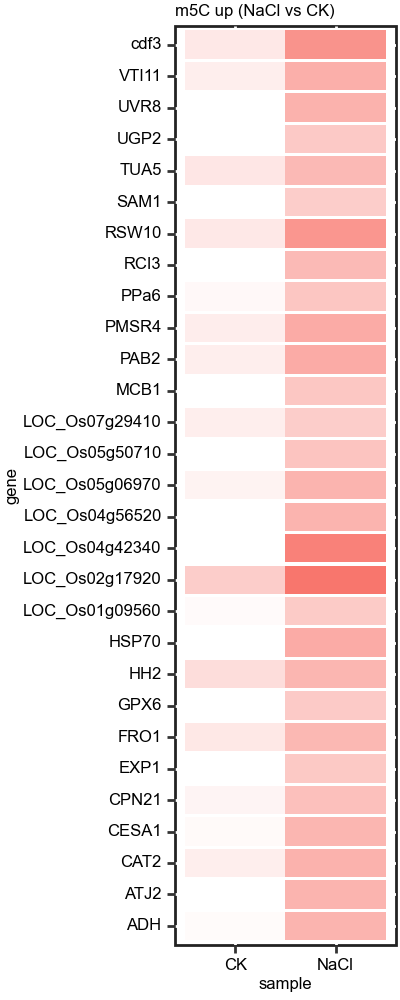

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 2 x 5 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/supplemental_figure_8c_heatmap_m5C_up_genes.pdf


In [14]:
#heatmap sort
from scipy import interpolate
import traceback

from plotnine import *
import pandas as pd
import re
import numpy as np


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

gene=[]
#CK=[]
#NaCl=[]
sample=[]
mod_rate=[]
gene_list=[]
    
up_gene_mod_rate_dict=dict(sorted(up_gene_mod_rate_dict.items(), key=lambda item: item[1][0],reverse=True))

for i,transcript_id in enumerate(up_gene_mod_rate_dict):
    
 
    
    gene_name=gene_name_dict.get(transcript_id.split(".")[0],transcript_id.split(".")[0])
    if gene_name == "":
        print(transcript_id.split(".")[0],gene_name)
        pass
        gene_name=transcript_id.split(".")[0]
        
        
    if gene_name not in gene_list:
        gene_list.append(gene_name)
    else:
        continue
        
    gene.append(gene_name)

    sample.append("CK")
    mod_rate.append(up_gene_mod_rate_dict[transcript_id][1])
    gene.append(gene_name)
    sample.append("NaCl")
    mod_rate.append(up_gene_mod_rate_dict[transcript_id][2])
    
    
    if len(gene)==60:

        break
        
data=pd.DataFrame({"gene":gene,"sample":sample,"mod rate":mod_rate})

#data['term'] = pd.Categorical(data.term, categories=pd.unique(data.term))  #reorder legend

p=(ggplot(data,aes("sample","gene",fill="mod rate"))
  +geom_tile(aes(width=1, height=.90))
  #+geom_text(aes(label="mod rate"), size=10)
  #+theme_bw()
  +theme(panel_background=element_rect(fill=gray, alpha=0),
    #legend_position='left',
    #legend_direction='horizontal', # affected by the ncol=2
    legend_title_align='center',
    legend_box_margin=5,
    #legend_background=element_rect(color=purple, size=2, fill='white'),
    legend_position=(1.2, 0.81),
    legend_box='vertical',

    legend_key=element_rect(fill=gray, alpha=1),
    legend_title=element_text(size=6),
    legend_text=element_text(size=6,family="Arial",color="black"),
    
    legend_key_size=0,            # overridden
    legend_key_width=6,
    legend_key_height=6,

    legend_entry_spacing=0,      # overridden
    legend_entry_spacing_x=15,
    legend_entry_spacing_y=5,
         

    panel_border=element_rect(color=black, size=1),
    axis_text_x=element_text(size=6,family="Arial",color="black",angle=0),
    axis_text_y=element_text(size=6,family="Arial",color="black"),
    axis_title_x=element_text(size=6,family="Arial",color="black"),
    axis_title_y=element_text(size=6,family="Arial",color="black"),
    plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
    figure_size=[2,5])

   +scale_fill_gradient(low = "white", high = "#F8766D")  
   +ggtitle("m5C up (NaCl vs CK)")
)
print(p)
p.save('figure/supplemental_figure_8c_heatmap_m5C_up_genes.pdf')  

### Genes with decreased m5C modification rate in NaCl-treated sample

In [16]:
#head map   down abiotic stimulus
down_gene_list=["LOC_Os03g49990.1","LOC_Os04g38410.1","LOC_Os11g47760.3","LOC_Os03g09250.1","LOC_Os01g68790.1",
                "LOC_Os08g22354.1","LOC_Os02g09150.1","LOC_Os11g47970.1","LOC_Os01g09510.4","LOC_Os12g08280.1",
                "LOC_Os07g41750.1","LOC_Os08g41390.2","LOC_Os06g43660.1","LOC_Os08g01380.2","LOC_Os11g06390.6",
                "LOC_Os01g54620.1","LOC_Os01g22010.4","LOC_Os05g49200.2","LOC_Os03g53190.1","LOC_Os03g08440.2",
                "LOC_Os05g35170.1","LOC_Os03g04410.1","LOC_Os05g32110.1","LOC_Os12g14070.1","LOC_Os01g05490.2",
                "LOC_Os05g44360.1","LOC_Os07g49400.4","LOC_Os04g56400.4","LOC_Os01g08700.4","LOC_Os06g43660.2",
                "LOC_Os02g33450.1","LOC_Os06g45820.4","LOC_Os05g01600.2","LOC_Os04g43070.1","LOC_Os03g16860.2",
                "LOC_Os02g57180.2","LOC_Os01g71230.2","LOC_Os03g09250.4","LOC_Os04g55650.2","LOC_Os01g22010.2",
                "LOC_Os01g68324.3","LOC_Os11g06390.1","LOC_Os08g14440.1","LOC_Os01g71230.1","LOC_Os03g40270.1",
                "LOC_Os11g13890.2","LOC_Os07g49400.1","LOC_Os10g34180.1","LOC_Os06g02144.1","LOC_Os05g42350.1",
                "LOC_Os09g20350.1","LOC_Os04g56520.1","LOC_Os05g35170.3","LOC_Os12g44310.2","LOC_Os11g08300.3",
                "LOC_Os03g17690.2","LOC_Os03g13970.2","LOC_Os11g06390.4","LOC_Os07g34570.2","LOC_Os11g47760.1",
                "LOC_Os07g08960.1","LOC_Os12g42884.3","LOC_Os07g49400.3","LOC_Os09g30412.1","LOC_Os08g03290.2",
                "LOC_Os03g28420.1","LOC_Os10g35720.2","LOC_Os05g45950.1","LOC_Os08g03290.4","LOC_Os03g53190.2",
                "LOC_Os06g09679.3","LOC_Os01g13770.1","LOC_Os09g26880.1","LOC_Os06g21590.2","LOC_Os01g05490.1",
                "LOC_Os11g13890.1","LOC_Os03g09250.2","LOC_Os11g47760.2","LOC_Os05g32110.4","LOC_Os12g44310.1",
                "LOC_Os02g52940.3","LOC_Os05g40420.3","LOC_Os02g07060.1","LOC_Os12g42884.1","LOC_Os11g14220.1",
                "LOC_Os05g08370.1","LOC_Os03g03720.2","LOC_Os05g44360.2","LOC_Os03g61970.1","LOC_Os05g07700.1",
                "LOC_Os09g26880.4","LOC_Os05g49880.1","LOC_Os01g17240.1","LOC_Os07g38730.1","LOC_Os03g32314.1",
                "LOC_Os03g16860.1","LOC_Os01g61380.1","LOC_Os02g51750.1","LOC_Os04g56400.1","LOC_Os06g02144.2",
                "LOC_Os02g57180.1","LOC_Os01g68790.2","LOC_Os12g38640.1","LOC_Os03g44620.2","LOC_Os11g13890.4",
                "LOC_Os06g45820.3","LOC_Os06g45820.1","LOC_Os10g08550.3","LOC_Os02g02400.3","LOC_Os01g08700.3",
                "LOC_Os02g41630.2","LOC_Os10g25780.3","LOC_Os12g38640.2","LOC_Os04g02820.2","LOC_Os01g09510.1",
                "LOC_Os07g37240.1","LOC_Os06g40080.1","LOC_Os11g08300.2","LOC_Os05g25850.1","LOC_Os05g49880.2",
                "LOC_Os01g13770.3","LOC_Os08g08840.2","LOC_Os01g62420.1","LOC_Os08g14440.2","LOC_Os01g22520.1",
                "LOC_Os06g08080.1","LOC_Os05g40420.2","LOC_Os09g26880.3","LOC_Os01g51120.2","LOC_Os02g01280.1",
                "LOC_Os01g21820.1","LOC_Os05g01600.1","LOC_Os07g34570.1","LOC_Os05g51830.1","LOC_Os08g41390.1",
                "LOC_Os06g09679.2","LOC_Os01g08700.5","LOC_Os04g57440.2","LOC_Os07g41750.2","LOC_Os01g62420.4",
                "LOC_Os10g38710.1","LOC_Os01g62420.3","LOC_Os02g02400.1","LOC_Os06g01500.1","LOC_Os05g07700.3",
                "LOC_Os11g11390.1","LOC_Os04g38600.4","LOC_Os02g41860.2","LOC_Os01g45274.1","LOC_Os07g12110.1",
                "LOC_Os10g38740.1","LOC_Os08g04280.1","LOC_Os03g09250.3","LOC_Os08g44770.1","LOC_Os03g57790.1",
                "LOC_Os06g08670.1","LOC_Os12g42884.2","LOC_Os06g46000.1","LOC_Os10g08550.5","LOC_Os06g45820.2",
                "LOC_Os06g43860.4","LOC_Os02g44630.2","LOC_Os06g11800.1","LOC_Os12g42876.1","LOC_Os06g43860.1",
                "LOC_Os08g44770.2","LOC_Os03g08440.1","LOC_Os03g01530.1","LOC_Os01g62840.1","LOC_Os05g41640.2",
                "LOC_Os06g01210.1","LOC_Os05g06750.1","LOC_Os02g51470.2","LOC_Os08g22354.2","LOC_Os07g49150.1",
                "LOC_Os01g16240.1","LOC_Os11g13890.6","LOC_Os03g57790.2","LOC_Os05g49200.1","LOC_Os03g03720.1",
                "LOC_Os08g25734.2","LOC_Os01g22520.2","LOC_Os03g46060.1","LOC_Os02g53420.1","LOC_Os08g09200.1",
                "LOC_Os02g57720.1","LOC_Os05g41640.3","LOC_Os07g01020.1","LOC_Os10g08550.1","LOC_Os02g44630.3",
                "LOC_Os03g03910.1","LOC_Os12g17600.2","LOC_Os01g43540.1","LOC_Os03g05290.1","LOC_Os08g14440.3",
                "LOC_Os01g51120.1","LOC_Os10g35720.1","LOC_Os02g51750.2","LOC_Os01g09560.1","LOC_Os07g46460.1",
                "LOC_Os07g37030.1","LOC_Os11g47760.5","LOC_Os04g56520.2","LOC_Os01g22010.3","LOC_Os11g47760.4",
                "LOC_Os03g51600.2","LOC_Os02g44630.1","LOC_Os02g51470.1","LOC_Os01g08700.2","LOC_Os10g25780.2",
                "LOC_Os03g25960.1","LOC_Os10g25780.1","LOC_Os03g50480.2","LOC_Os08g01380.1","LOC_Os05g32110.3",
                "LOC_Os11g06390.2","LOC_Os04g55650.1","LOC_Os06g02380.1","LOC_Os12g17600.1","LOC_Os02g09150.2",
                "LOC_Os01g67860.1","LOC_Os03g52840.1","LOC_Os02g02870.1","LOC_Os02g57040.1","LOC_Os05g38150.2",
                "LOC_Os01g13770.2","LOC_Os06g04020.1","LOC_Os07g26630.1","LOC_Os07g26690.2","LOC_Os01g43410.1",
                "LOC_Os06g21590.1","LOC_Os02g52940.2","LOC_Os04g02820.3","LOC_Os01g22010.1","LOC_Os05g25850.2",
                "LOC_Os03g52840.3","LOC_Os02g38920.1","LOC_Os02g41860.4","LOC_Os01g16190.1","LOC_Os03g02960.1",
                "LOC_Os02g32030.1","LOC_Os02g57040.2","LOC_Os02g02400.2","LOC_Os08g03290.3","LOC_Os05g31000.1",
                "LOC_Os03g17690.1","LOC_Os02g57040.3","LOC_Os03g17240.1","LOC_Os03g21950.1","LOC_Os10g34180.2",
                "LOC_Os06g45120.2","LOC_Os06g01500.2","LOC_Os11g09280.1","LOC_Os01g64630.4","LOC_Os07g27790.1",
                "LOC_Os01g08700.6","LOC_Os03g52840.2","LOC_Os11g47760.6","LOC_Os03g18690.1","LOC_Os03g52630.2",
                "LOC_Os07g25420.1","LOC_Os05g38150.1","LOC_Os06g43660.3","LOC_Os05g06500.1","LOC_Os02g33450.2",
                "LOC_Os07g49400.2","LOC_Os03g52630.1","LOC_Os06g01500.3","LOC_Os01g68790.4","LOC_Os02g51470.3",
                "LOC_Os02g52940.1","LOC_Os11g06390.3","LOC_Os02g47020.1","LOC_Os06g09679.1","LOC_Os08g33820.1",
                "LOC_Os01g64630.1","LOC_Os07g34006.1","LOC_Os06g02380.2","LOC_Os06g43860.2","LOC_Os11g09280.2",
                "LOC_Os01g62420.2","LOC_Os06g45120.1","LOC_Os09g38030.2","LOC_Os01g08700.8","LOC_Os05g35170.2",
                "LOC_Os07g43810.1","LOC_Os08g08840.1","LOC_Os04g02820.1","LOC_Os03g18070.1","LOC_Os03g13970.1",
                "LOC_Os03g12030.1","LOC_Os02g15900.1","LOC_Os04g56400.3","LOC_Os04g57440.1","LOC_Os01g68790.3",
                "LOC_Os11g06390.5","LOC_Os10g32550.1","LOC_Os01g08700.1","LOC_Os01g18050.1","LOC_Os03g50480.1",
                "LOC_Os05g32110.2","LOC_Os08g25734.1","LOC_Os08g03290.1","LOC_Os08g32870.1","LOC_Os05g41640.1",
                "LOC_Os11g08300.1","LOC_Os09g38030.1","LOC_Os07g41750.3","LOC_Os05g07700.4","LOC_Os11g13890.5",
                "LOC_Os03g51600.1","LOC_Os02g27030.1","LOC_Os07g25420.2","LOC_Os08g04280.2"]

len(down_gene_list)
down_gene_mod_rate_dict={}

for id in WT_dict:
    if id not in NaCl_dict:
        continue
    transcript_id=id.split(".M")[0]
    
    if transcript_id not in down_gene_list:
        continue
    if transcript_id not in down_gene_mod_rate_dict:
        down_gene_mod_rate_dict[transcript_id]=[0,0,0]
    
    NaCl_mod_rate= NaCl_dict[id][0]/NaCl_dict[id][1]
    WT_mod_rate= WT_dict[id][0]/WT_dict[id][1]  
    
    diff_mod_rate=WT_mod_rate-NaCl_mod_rate
    
    if diff_mod_rate>down_gene_mod_rate_dict[transcript_id][0]:
        down_gene_mod_rate_dict[transcript_id][0]=diff_mod_rate
        down_gene_mod_rate_dict[transcript_id][1]=WT_mod_rate
        down_gene_mod_rate_dict[transcript_id][2]=NaCl_mod_rate
    



LOC_Os07g08960 


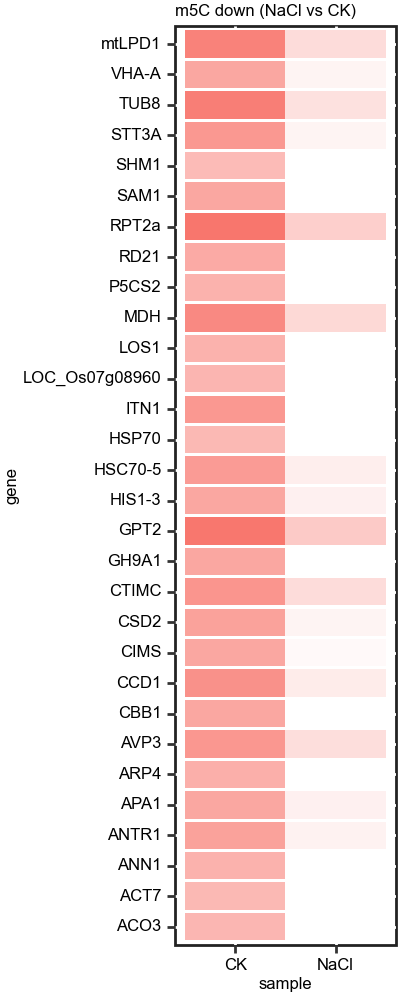

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 2 x 5 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/supplemental_figure_8c_heatmap_m5C_down_genes.pdf


In [17]:
#heatmap sort
from scipy import interpolate
import traceback

from plotnine import *
import pandas as pd
import re
import numpy as np


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

gene=[]
#CK=[]
#NaCl=[]
sample=[]
mod_rate=[]
gene_list=[]


down_gene_mod_rate_dict=dict(sorted(down_gene_mod_rate_dict.items(), key=lambda item: item[1][0],reverse=True))

for i,transcript_id in enumerate(down_gene_mod_rate_dict):

  
    gene_name=gene_name_dict.get(transcript_id.split(".")[0],transcript_id.split(".")[0])
    
    if gene_name not in gene_list:
        gene_list.append(gene_name)
    else:
        continue
    
    if gene_name == "":
        print(transcript_id.split(".")[0],gene_name)

        gene_name=transcript_id.split(".")[0]
        
    gene.append(gene_name)
    sample.append("CK")
    mod_rate.append(down_gene_mod_rate_dict[transcript_id][1])
    gene.append(gene_name)
    sample.append("NaCl")
    mod_rate.append(down_gene_mod_rate_dict[transcript_id][2])

    if len(gene)==60:
        break

data=pd.DataFrame({"gene":gene,"sample":sample,"mod rate":mod_rate})

#data['term'] = pd.Categorical(data.term, categories=pd.unique(data.term))  #reorder legend

p=(ggplot(data,aes("sample","gene",fill="mod rate"))
  +geom_tile(aes(width=1, height=.90))
  #+geom_text(aes(label="mod rate"), size=10)
  #+theme_bw()
  +theme(panel_background=element_rect(fill=gray, alpha=0),
    #legend_position='left',
    #legend_direction='horizontal', # affected by the ncol=2
    legend_title_align='center',
    legend_box_margin=5,
    #legend_background=element_rect(color=purple, size=2, fill='white'),
    legend_position=(1.2,0.81),
    legend_box='vertical',

    legend_key=element_rect(fill=gray, alpha=1),
    legend_title=element_text(size=6),
    legend_text=element_text(size=6,family="Arial",color="black"),

    legend_key_size=0,            # overridden
    legend_key_width=6,
    legend_key_height=6,

    legend_entry_spacing=0,      # overridden
    legend_entry_spacing_x=15,
    legend_entry_spacing_y=5,
    panel_border=element_rect(color=black, size=1),
    axis_text_x=element_text(size=6,family="Arial",color="black",angle=0),
    axis_text_y=element_text(size=6,family="Arial",color="black"),
    axis_title_x=element_text(size=6,family="Arial",color="black"),
    axis_title_y=element_text(size=6,family="Arial",color="black"),
    plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),

    figure_size=[2,5])

   +scale_fill_gradient(low = "white", high = "#F8766D")  
   +ggtitle("m5C down (NaCl vs CK)")
)

print(p)
p.save('figure/supplemental_figure_8c_heatmap_m5C_down_genes.pdf')  

